In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC 
from scipy import stats
from sklearn.datasets import make_blobs

/home/akshitbhalla/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
X, Y = make_blobs(
    n_samples = 50,
    centers = 2,
    random_state = 0,
    cluster_std = 0.6
)

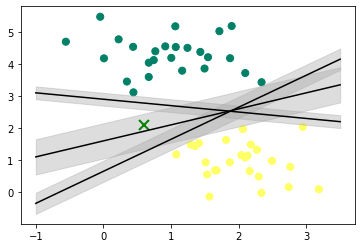

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "summer")
plt.plot([0.6], [2.1], "x", color = "green", markeredgewidth = 2, markersize = 10)
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m*xfit + b
    plt.plot(xfit, yfit, "-k")
    plt.fill_between(
        xfit, 
        yfit - d,
        yfit + d,
        edgecolor = "none",
        color = "#AAAAAA",
        alpha = 0.4
    )

plt.show()

In [4]:
model = SVC(kernel = "linear", C = 1e10)
model.fit(X, Y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [5]:
def plot_svc_decision_function(model, ax = None, plot_support = True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(
        X, 
        Y, 
        P, 
        colors = 'k',
        levels = [-1, 0, 1], 
        alpha = 0.5,
        linestyles = ['--', '-', '--']
    )
    
    # plot support vectors
    if plot_support:
        ax.scatter(
            model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s = 300, 
            linewidth = 1, 
            facecolors = 'none'
        )
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

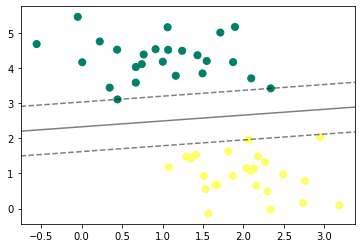

In [7]:
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = 'summer')
plot_svc_decision_function(model)

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])